In [70]:

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [71]:
human_df = pd.read_csv(r'..\Cases\human-resources-analytics\HR_comma_sep.csv')
human_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [72]:
X= human_df.drop(columns=['left'])
y= human_df['left']

In [73]:
ohe=OneHotEncoder(sparse=False, drop='first').set_output(transform='pandas')
ct1=make_column_transformer((ohe, make_column_selector(dtype_include='object')), remainder='passthrough',verbose_feature_names_out=False)
ct1=ct1.set_output(transform='pandas')
X_ohe=ct1.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_ohe,y,test_size=0.3,random_state=25)

0.8015114469882196

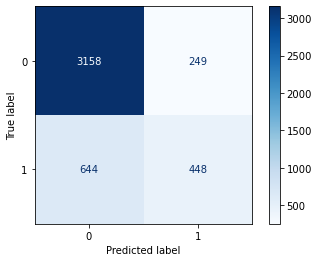

In [74]:
lr=LogisticRegression(penalty='l2', solver='lbfgs',l1_ratio=0.9)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
# lr.score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
accuracy_score(y_test,y_pred)

# penalty='elasticnet', solver='saga' => 0.753945321182485
# penalty='none', solver='saga' => 0.753945321182485
# (penalty='l1', solver='saga' => 0.753945321182485

### Inferncing

0.8015114469882196

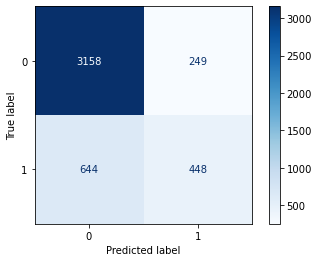

In [75]:
y_pred=lr.predict(X_test)
# lr.score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
accuracy_score(y_test,y_pred)

In [77]:
test_human = pd.read_csv(r'..\Cases\human-resources-analytics\tst_hr.csv')
test_human.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.11,0.88,7,272,4,0,0,sales,medium
1,0.72,0.87,5,223,5,0,0,sales,low
2,0.37,0.52,2,159,3,0,0,sales,low
3,0.41,0.50,2,153,3,0,0,sales,low
4,0.67,0.61,3,202,2,0,0,technical,medium


In [80]:
X_tst_ohe=ct1.transform(test_human)
X_tst_ohe.columns,X_train.columns

(Index(['Department_RandD', 'Department_accounting', 'Department_hr',
        'Department_management', 'Department_marketing',
        'Department_product_mng', 'Department_sales', 'Department_support',
        'Department_technical', 'salary_low', 'salary_medium',
        'satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years'],
       dtype='object'),
 Index(['Department_RandD', 'Department_accounting', 'Department_hr',
        'Department_management', 'Department_marketing',
        'Department_product_mng', 'Department_sales', 'Department_support',
        'Department_technical', 'salary_low', 'salary_medium',
        'satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years'],
       dtype='object'))

In [81]:
y_test_pred=lr.predict(X_tst_ohe)
y_test_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)